図11.5のプロット

In [1]:
#計算とグラフプロットに必要なモジュールの読み込み
import numpy as np
from control import matlab
from matplotlib import pyplot as plt
from scipy import arange 
from scipy import signal

/Users/kaz/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/matplotlib/axes/_base.py:3285: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))
/Users/kaz/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/control/freqplot.py:153: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(True);
/Users/kaz/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/Users/kaz/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in

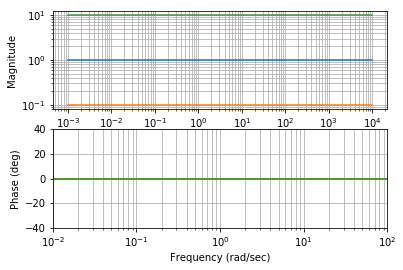

In [2]:
#比例要素のパラメータ
K1 = 1.0 #K=1
K2 = 0.1 #K=0.1
K3 = 10.0 #K=10

#伝達関数の分子・分母多項式を与える
num1 = [K1] #K=1の場合の分子多項式
num2 = [K2] #K=0.1の場合の分子多項式
num3 = [K3] #K=10の場合の分子多項式
den = [1] #分母多項式

#伝達関数表現を与える
sys1 = matlab.tf(num1,den) #比例要素K=1の場合の伝達関数表現
sys2 = matlab.tf(num2,den) #比例要素K=0.1の場合の伝達関数表現
sys3 =matlab. tf(num3,den) #比例要素K=10の場合の伝達関数表現

#角周波数の範囲を指定
w = np.logspace(-3, 4, 1000) #対数的に等間隔なベクトルの生成(10^{-3}から10^{4}で1000点)

# 図11.2のBode線図のプロット
[gain,phase,om] = matlab.bode(sys1, sys2, sys3, w) #Kの値に応じた伝達関数のゲインと位相の計算
plt.xlim([0.01,100]) #横軸の範囲の指定
plt.ylim([-40,40]) #縦軸の範囲の指定
plt.show() #グラフの表示

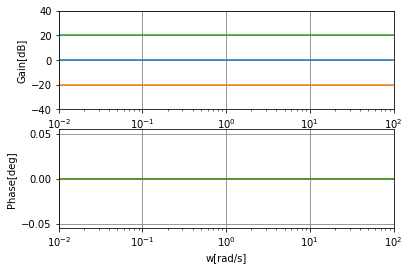

In [3]:
#伝達関数表現を与える
sys1 = signal.lti(num1, den) #比例要素K=1の場合の伝達関数表現（signal.ltiの場合）
sys2 = signal.lti(num2, den) #比例要素K=0.1の場合の伝達関数表現（signal.ltiの場合）
sys3 = signal.lti(num3, den) #比例要素K=10の場合の伝達関数表現（signal.ltiの場合）

#角周波数の範囲を指定
w = np.logspace(-2, 2, 1000) #対数的に等間隔なベクトルの生成(10^{-2}から10^{2}で1000点)

#周波数応答の計算．wは角周波数，gainはゲイン,phaseは位相を表す．
[w1, gain1, phase1] = signal.bode(sys1, w) #比例要素K=1の伝達関数のゲインと位相
[w2, gain2, phase2] = signal.bode(sys2, w) #比例要素K=0.1の伝達関数のゲインと位相
[w3, gain3, phase3] = signal.bode(sys3, w) #比例要素K=10の伝達関数のゲインと位相

# ゲイン線図のプロット
plt.subplot(2, 1, 1) #複数の図を並べるためのコマンド．2行1列の1行目という意味
plt.semilogx(w1, gain1, w2, gain2, w3, gain3) #ゲイン線図をプロット
plt.xlim([0.01,100]) #横軸（角周波数）の範囲の指定
plt.ylim([-40,40]) #縦軸（デシベル値）の範囲の指定
plt.grid(color='gray') #罫線を灰色で表示
plt.ylabel("Gain[dB]") #縦軸の表示
#plt.xlabel("w[rad/s]") #横軸のラベル表示

# 位相線図のプロット
plt.subplot(2, 1, 2) #複数の図を並べるためのコマンド．2行1列の2行目という意味
plt.semilogx(w1, phase1, w2, phase2, w3, phase3) #位相線図をプロット
plt.xlim([0.01,100]) #横軸（角周波数）の範囲の指定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("w[rad/s]") #横軸のラベル表示
plt.ylabel("Phase[deg]") #縦軸の表示
plt.show() #グラフの表示